In [5]:
%load_ext autoreload
%autoreload 2

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import numpy as np
from waymo_open_dataset import dataset_pb2 as open_dataset
import matplotlib.pyplot as plt
import dask.dataframe as dd
import tensorflow as tf
from waymo_open_dataset import v2
import time
from typing import Any, Dict, Iterator, List, Optional, Sequence, Tuple
from waymo_open_dataset.utils import camera_segmentation_utils
import cv2
tf.compat.v1.enable_eager_execution()

from DataLoader.pvps_dataset import PanopticSegmentationDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
train_transform = transforms.Compose([
    transforms.ToTensor()
])
batch_size = 5
datasetNum = 1 # for testing. Only fetch 10 timestamps
desired_context_name = None # optionally, you can only load a specific context name
desired_timestamp = None # you can even specify a particular timestamp. Make sure it's within the context name.
frames_path = "/media/kaiwenjon/Kevin-linux-dats/waymo/dataset_v2/training/camera_image"
labels_path = "/media/kaiwenjon/Kevin-linux-dats/waymo/dataset_v2/training/camera_segmentation"
frames_id_list_path = "./2d_pvps_training_frames.txt"
dataset = PanopticSegmentationDataset(frames_path, labels_path, frames_id_list_path, datasetNum, desired_context_name, desired_timestamp, transform=train_transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, num_workers=2)

Data prepared to be imported:  1  frames.
context_name:  10017090168044687777_6380_000_6400_000 Timestamp:  1550083469645130


2023-04-20 20:34:09.761590: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-20 20:34:09.784166: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-20 20:34:09.784466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-20 20:34:09.785390: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


2023-04-20 20:34:10.997025: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-20 20:34:10.997229: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-20 20:34:10.997361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-20 20:34:10.997522: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3051 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:06:00.0, compute capability: 6.1
Clipping input data to the valid range for

fetched batch 0, data size: 1, time elapsed:2.5851504802703857
Visualize frames and labels for the 0 timestamp in the batch 0
[[[ 112 -126 -104]
  [ 113 -125 -103]
  [ 111 -127 -105]
  ...
  [ -99  -55  -10]
  [-104  -59  -17]
  [-102  -57  -15]]

 [[ 116 -122 -100]
  [ 116 -122 -100]
  [ 115 -123 -101]
  ...
  [ -92  -48   -3]
  [ -99  -54  -12]
  [-100  -55  -13]]

 [[ 115 -123 -101]
  [ 113 -125 -103]
  [ 114 -124 -102]
  ...
  [-102  -58  -13]
  [-107  -62  -20]
  [-106  -61  -19]]

 ...

 [[  77   89  105]
  [  74   87  103]
  [  73   86  102]
  ...
  [  52   72   79]
  [  53   73   80]
  [  55   75   82]]

 [[  79   87  106]
  [  75   86  104]
  [  74   85  103]
  ...
  [  53   73   80]
  [  55   74   81]
  [  55   74   81]]

 [[  78   86  105]
  [  75   83  102]
  [  72   83  101]
  ...
  [  54   74   81]
  [  56   73   81]
  [  55   72   80]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ -87  -37   -4]
  [ -88  -38   -5]
  [ -84  -34   -1]
  ...
  [  76  104 -128]
  [  75  105 -125]
  [  73  103 -127]]

 [[ -88  -38   -5]
  [ -90  -40   -7]
  [ -89  -39   -6]
  ...
  [  77  105 -127]
  [  76  106 -124]
  [  74  104 -126]]

 [[ -90  -40   -7]
  [ -89  -39   -6]
  [ -90  -40   -7]
  ...
  [  78  106 -126]
  [  76  106 -126]
  [  75  105 -127]]

 ...

 [[  61   81   92]
  [  61   81   92]
  [  65   85   96]
  ...
  [  67   83   96]
  [  66   82   95]
  [  65   81   94]]

 [[  66   86   97]
  [  64   84   95]
  [  67   87   98]
  ...
  [  66   82   95]
  [  63   81   93]
  [  62   80   92]]

 [[  71   91  102]
  [  68   88   99]
  [  69   89  100]
  ...
  [  67   83   96]
  [  64   82   94]
  [  62   80   92]]]
[[[-101  -45   -1]
  [-104  -50   -3]
  [-106  -59  -13]
  ...
  [  37   75   84]
  [  45   74   88]
  [  46   74   88]]

 [[-111  -58   -8]
  [-110  -58  -10]
  [-109  -62  -16]
  ...
  [  36   70   79]
  [  40   70   81]
  [  41   69   81]]

 [[-113  -61  -13]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[  72   71   43]
  [  70   68   43]
  [  67   65   42]
  ...
  [ 122 -111  -67]
  [ 114 -123  -83]
  [ 101  119  -99]]

 [[  69   65   38]
  [  67   65   40]
  [  69   64   42]
  ...
  [-125 -102  -58]
  [ 114 -123  -83]
  [  91  109 -109]]

 [[  68   62   36]
  [  68   64   39]
  [  70   64   42]
  ...
  [ 117 -116  -72]
  [ 104  123  -91]
  [  97  115 -101]]

 ...

 [[  70   79   78]
  [  70   79   78]
  [  69   78   77]
  ...
  [  91  115 -117]
  [  87  113 -120]
  [  88  114 -119]]

 [[  70   79   78]
  [  70   79   78]
  [  69   78   77]
  ...
  [  94  118 -114]
  [  91  117 -116]
  [  92  118 -115]]

 [[  68   77   76]
  [  68   77   76]
  [  68   77   76]
  ...
  [  99  123 -109]
  [  94  120 -113]
  [  90  116 -117]]]
[[[40 56 56]
  [43 59 59]
  [44 60 60]
  ...
  [45 65 53]
  [39 59 47]
  [35 55 43]]

 [[48 62 63]
  [49 65 65]
  [49 63 64]
  ...
  [45 67 54]
  [42 64 51]
  [39 61 48]]

 [[51 62 64]
  [50 64 65]
  [51 62 64]
  ...
  [45 69 53]
  [42 69 54]
  [40 68 53]]

 ...

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


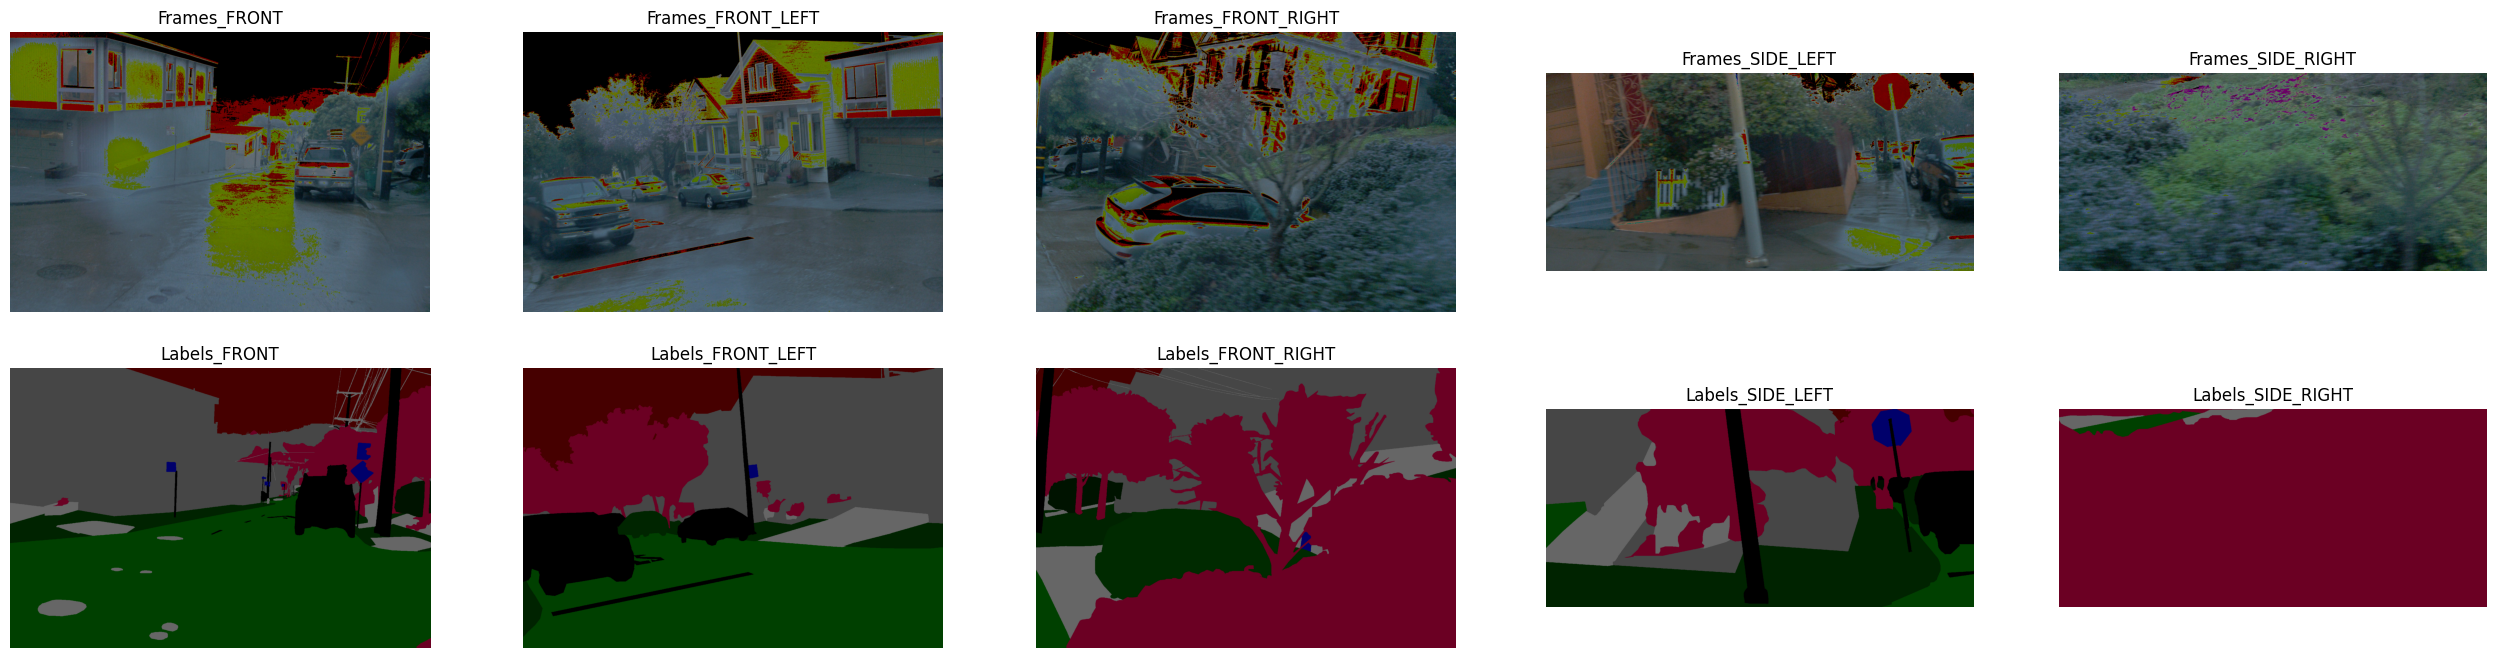

In [10]:
camera_name_list = {
            1 : "FRONT",
            2 : "FRONT_LEFT",
            3 : "FRONT_RIGHT",
            4 : "SIDE_LEFT",
            5 : "SIDE_RIGHT"
        }
start = time.time()
for batch_idx, (frames, labels) in enumerate(dataloader):
    print(f"fetched batch {batch_idx}, data size: {frames[0][0].size(0)}, time elapsed:{time.time()-start}")
    # data format
    # frames: a list[FRONT_list, FRONT_LEFT_list, FRONT_RIGHT_list, SIDE_LEFT_list, SIDERIGHT_list]
    # frames[0]: FRONT_list: a list[FRONT_TENSOR, CameraNameTuple]
    # frames[0][0]: FRONT_TENSOR: torch.Size([batch_size, 3, 1280, 1920])
    # frames[0][1]: CameraNameTuple: ('FRONT', 'FRONT', 'FRONT', ....(batch_size)), in theory they should all be the same

    # labels: a list[FRONT_list, FRONT_LEFT_list, FRONT_RIGHT_list, SIDE_LEFT_list, SIDERIGHT_list]
    # labels[0]: FRONT_list: a list[FRONT_semantic_label_tensor, FRONT_instance_label_tensor, panoptic_label_tensor, CameraNameTuple]
    # labels[0][0]: FRONT_semantic_label_tensor: torch.Size([batch_size, 1, 1280, 1920])
    # labels[0][1]: FRONT_instance_label_tensor: torch.Size([batch_size, 1, 1280, 1920])
    # labels[0][2]: FRONT_panoptic_rgb_label_tensor: torch.Size([batch_size, 3, 1280, 1920])
    # labels[0][3]: CameraNameTuple: ('FRONT', 'FRONT', 'FRONT', ....(batch_size)), in theory they should all be the same
    for i in camera_name_list:
        cameraTupleFrame = frames[i-1][1]
        cameraTupleLabel = labels[i-1][3]
        assert all(element == cameraTupleFrame[0] for element in cameraTupleFrame)
        assert all(element == cameraTupleLabel[0] for element in cameraTupleLabel)
        assert cameraTupleFrame[0] == camera_name_list[i]
        assert cameraTupleLabel[0] == camera_name_list[i]
    
    # torch.Size([batch_size, 3, 1280, 1920])
    imgs_FRONT = frames[0][0]
    imgs_FRONT_LEFT = frames[1][0]
    imgs_FRONT_RIGHT = frames[2][0]
    imgs_SIDE_LEFT = frames[3][0]
    imgs_SIDE_RIGHT = frames[4][0]
    
    # torch.Size([batch_size, 1, 1280, 1920])
    semantic_labels_FRONT = labels[0][0]
    semantic_labels_FRONT_LEFT = labels[1][0]
    semantic_labels_FRONT_RIGHT = labels[2][0]
    semantic_labels_SIDE_LEFT = labels[3][0]
    semantic_labels_SIDE_RIGHT = labels[4][0]
    
    # torch.Size([batch_size, 1, 1280, 1920])
    instance_labels_FRONT = labels[0][1]
    instance_labels_FRONT_LEFT = labels[1][1]
    instance_labels_FRONT_RIGHT = labels[2][1]
    instance_labels_SIDE_LEFT = labels[3][1]
    instance_labels_SIDE_RIGHT = labels[4][1]
    
    # torch.Size([batch_size, 3, 1280, 1920])
    panoptic_rgb_labels_FRONT = labels[0][2]
    panoptic_rgb_labels_FRONT_LEFT = labels[1][2]
    panoptic_rgb_labels_FRONT_RIGHT = labels[2][2]
    panoptic_rgb_labels_SIDE_LEFT = labels[3][2]
    panoptic_rgb_labels_SIDE_RIGHT = labels[4][2]
    if(batch_idx >= 0):
        timestamp_to_plot = 0 # any num within batch_size
        print(f"Visualize frames and labels for the {timestamp_to_plot} timestamp in the batch {batch_idx}")
        fig, axs = plt.subplots(2, 5, figsize=(32, 8), subplot_kw={'xticks': [], 'yticks': []})
        for i in range(5):
            img = frames[i][0][timestamp_to_plot].squeeze().permute(1, 2, 0).numpy()
            print(img)
            axs[0, i].imshow(img)
            axs[0, i].axis('off')
            axs[0, i].set_title(f'Frames_{frames[i][1][0]}')
            img = np.float32(img)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'./data/Frames_{frames[i][1][0]}.png', img_rgb)

        # Plot the remaining 5 images in the second row
        for i in range(5):
            img = labels[i][2][timestamp_to_plot].squeeze().permute(1, 2, 0).numpy()
            axs[1, i].imshow(img)
            axs[1, i].axis('off')
            axs[1, i].set_title(f'Labels_{labels[i][3][0]}')
            img = np.float32(img)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'./data/Labels_{labels[i][3][0]}.png', img_rgb)

        # Show the plot
        plt.show()
    
    start = time.time()

In [8]:
test_transform = transforms.Compose([
    transforms.ToTensor()
])
datasetNum = 10 # for testing. Only fetch 10 timestamps
desired_context_name = None # optionally, you can only load a specific context name
desired_timestamp = None # you can even specify a particular timestamp. Make sure it's within the context name.
frames_path = "/media/kaiwenjon/Kevin-linux-dats/waymo/dataset_v2/testing_location/camera_image"
labels_path = "/media/kaiwenjon/Kevin-linux-dats/waymo/dataset_v2/testing_location/camera_segmentation"
frames_id_list_path = "./2d_pvps_test_frames.txt"
dataset = PanopticSegmentationDataset(frames_path, labels_path, frames_id_list_path, datasetNum, desired_context_name, desired_timestamp, transform=test_transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)

Data prepared to be imported:  10  frames.
context_name:  10149575340910243572_2720_000_2740_000 Timestamp:  1558035217562493
context_name:  10149575340910243572_2720_000_2740_000 Timestamp:  1558035217762472
context_name:  10149575340910243572_2720_000_2740_000 Timestamp:  1558035217962441
context_name:  10149575340910243572_2720_000_2740_000 Timestamp:  1558035218162443
context_name:  10149575340910243572_2720_000_2740_000 Timestamp:  1558035218362457
context_name:  10149575340910243572_2720_000_2740_000 Timestamp:  1558035218562478
context_name:  10149575340910243572_2720_000_2740_000 Timestamp:  1558035218762563
context_name:  10149575340910243572_2720_000_2740_000 Timestamp:  1558035218962606
context_name:  10149575340910243572_2720_000_2740_000 Timestamp:  1558035219162662
context_name:  10149575340910243572_2720_000_2740_000 Timestamp:  1558035219362780


ValueError: An error occurred while calling the read_parquet method registered to the pandas backend.
Original Message: empty urlpath sequence

In [3]:
validation_transform = transforms.Compose([
    transforms.ToTensor()
])
datasetNum = 10 # for testing. Only fetch 10 timestamps
desired_context_name = None # optionally, you can only load a specific context name
desired_timestamp = None # you can even specify a particular timestamp. Make sure it's within the context name.
frames_path = "/media/kaiwenjon/Kevin-linux-dats/waymo/dataset_v2/validation/camera_image"
labels_path = "/media/kaiwenjon/Kevin-linux-dats/waymo/dataset_v2/validation/camera_segmentation"
frames_id_list_path = "./2d_pvps_validation_frames.txt"
dataset = PanopticSegmentationDataset(frames_path, labels_path, frames_id_list_path, datasetNum, desired_context_name, desired_timestamp, transform=validation_transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)

Data prepared to be imported:  10  frames.
context_name:  1024360143612057520_3580_000_3600_000 Timestamp:  1553735853462203
context_name:  1024360143612057520_3580_000_3600_000 Timestamp:  1553735853662172
context_name:  1024360143612057520_3580_000_3600_000 Timestamp:  1553735853862138
context_name:  1024360143612057520_3580_000_3600_000 Timestamp:  1553735854062107
context_name:  1024360143612057520_3580_000_3600_000 Timestamp:  1553735854262120
context_name:  1024360143612057520_3580_000_3600_000 Timestamp:  1553735854462129
context_name:  1024360143612057520_3580_000_3600_000 Timestamp:  1553735854662125
context_name:  1024360143612057520_3580_000_3600_000 Timestamp:  1553735854862102
context_name:  1024360143612057520_3580_000_3600_000 Timestamp:  1553735855062125
context_name:  1024360143612057520_3580_000_3600_000 Timestamp:  1553735855262132


2023-04-15 20:40:27.091441: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-15 20:40:27.463087: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-15 20:40:27.463690: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-15 20:40:27.469266: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

You can't be slow 0.003323078155517578
You can't be slow 0.0020334720611572266
You can't be slow 0.0016074180603027344
You can't be slow 0.0019664764404296875
You can't be slow 0.0015513896942138672
6.88 s, imported  1024360143612057520_3580_000_3600_000 1553735853462203
You can't be slow 0.0014374256134033203
You can't be slow 0.0014774799346923828
You can't be slow 0.001046895980834961
You can't be slow 0.0014960765838623047
You can't be slow 0.0009431838989257812
1.06 s, imported  1024360143612057520_3580_000_3600_000 1553735853662172
You can't be slow 0.0019371509552001953
You can't be slow 0.007611751556396484
You can't be slow 0.0010578632354736328
You can't be slow 0.001461029052734375
You can't be slow 0.0009641647338867188
1.15 s, imported  1024360143612057520_3580_000_3600_000 1553735853862138
You can't be slow 0.001421213150024414
You can't be slow 0.0013768672943115234
You can't be slow 0.0012004375457763672
You can't be slow 0.002173900604248047
You can't be slow 0.0011291

KeyboardInterrupt: 

Loaded image (430782 bytes) for camera_image.key.camera_name=1 1553628864248893 camera_image.key.camera_name=1


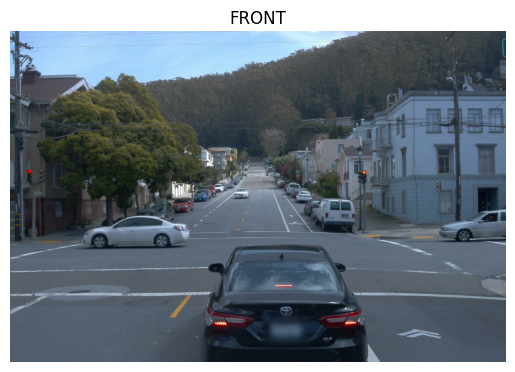

0
Loaded image (456226 bytes) for camera_image.key.camera_name=2 1553628864248893 camera_image.key.camera_name=2
Loaded image (310542 bytes) for camera_image.key.camera_name=4 1553628864248893 camera_image.key.camera_name=4
Loaded image (341771 bytes) for camera_image.key.camera_name=3 1553628864248893 camera_image.key.camera_name=3
Loaded image (194267 bytes) for camera_image.key.camera_name=5 1553628864248893 camera_image.key.camera_name=5
Loaded image (431692 bytes) for camera_image.key.camera_name=1 1553628864348883 camera_image.key.camera_name=1
Loaded image (456370 bytes) for camera_image.key.camera_name=2 1553628864348883 camera_image.key.camera_name=2
Loaded image (310632 bytes) for camera_image.key.camera_name=4 1553628864348883 camera_image.key.camera_name=4
Loaded image (341943 bytes) for camera_image.key.camera_name=3 1553628864348883 camera_image.key.camera_name=3
Loaded image (194525 bytes) for camera_image.key.camera_name=5 1553628864348883 camera_image.key.camera_name=5

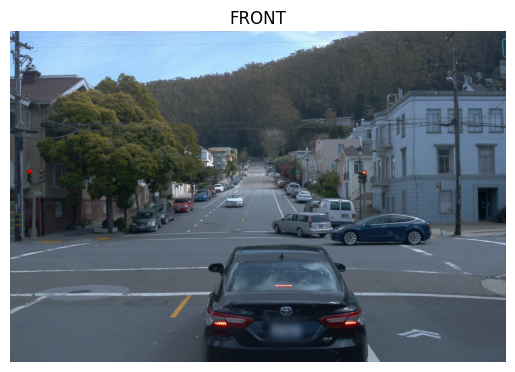

100
Loaded image (455528 bytes) for camera_image.key.camera_name=2 1553628866248862 camera_image.key.camera_name=2
Loaded image (310601 bytes) for camera_image.key.camera_name=4 1553628866248862 camera_image.key.camera_name=4
Loaded image (341349 bytes) for camera_image.key.camera_name=3 1553628866248862 camera_image.key.camera_name=3
Loaded image (194588 bytes) for camera_image.key.camera_name=5 1553628866248862 camera_image.key.camera_name=5
Loaded image (428832 bytes) for camera_image.key.camera_name=1 1553628866348889 camera_image.key.camera_name=1
Loaded image (455872 bytes) for camera_image.key.camera_name=2 1553628866348889 camera_image.key.camera_name=2
Loaded image (310946 bytes) for camera_image.key.camera_name=4 1553628866348889 camera_image.key.camera_name=4
Loaded image (341124 bytes) for camera_image.key.camera_name=3 1553628866348889 camera_image.key.camera_name=3
Loaded image (194471 bytes) for camera_image.key.camera_name=5 1553628866348889 camera_image.key.camera_name

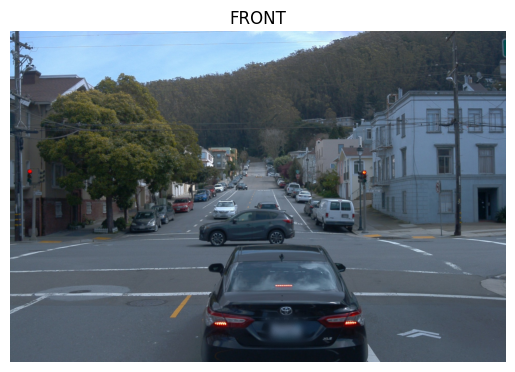

200
Loaded image (457085 bytes) for camera_image.key.camera_name=2 1553628868248879 camera_image.key.camera_name=2
Loaded image (311488 bytes) for camera_image.key.camera_name=4 1553628868248879 camera_image.key.camera_name=4
Loaded image (341577 bytes) for camera_image.key.camera_name=3 1553628868248879 camera_image.key.camera_name=3
Loaded image (194270 bytes) for camera_image.key.camera_name=5 1553628868248879 camera_image.key.camera_name=5
Loaded image (427659 bytes) for camera_image.key.camera_name=1 1553628868348901 camera_image.key.camera_name=1
Loaded image (456835 bytes) for camera_image.key.camera_name=2 1553628868348901 camera_image.key.camera_name=2
Loaded image (311221 bytes) for camera_image.key.camera_name=4 1553628868348901 camera_image.key.camera_name=4
Loaded image (341079 bytes) for camera_image.key.camera_name=3 1553628868348901 camera_image.key.camera_name=3
Loaded image (194208 bytes) for camera_image.key.camera_name=5 1553628868348901 camera_image.key.camera_name

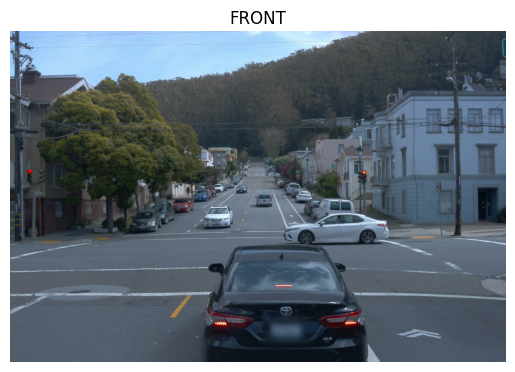

300
Loaded image (456754 bytes) for camera_image.key.camera_name=2 1553628870248899 camera_image.key.camera_name=2
Loaded image (312148 bytes) for camera_image.key.camera_name=4 1553628870248899 camera_image.key.camera_name=4
Loaded image (338774 bytes) for camera_image.key.camera_name=3 1553628870248899 camera_image.key.camera_name=3
Loaded image (194044 bytes) for camera_image.key.camera_name=5 1553628870248899 camera_image.key.camera_name=5
Loaded image (429622 bytes) for camera_image.key.camera_name=1 1553628870348924 camera_image.key.camera_name=1
Loaded image (456603 bytes) for camera_image.key.camera_name=2 1553628870348924 camera_image.key.camera_name=2
Loaded image (312170 bytes) for camera_image.key.camera_name=4 1553628870348924 camera_image.key.camera_name=4
Loaded image (338495 bytes) for camera_image.key.camera_name=3 1553628870348924 camera_image.key.camera_name=3
Loaded image (194470 bytes) for camera_image.key.camera_name=5 1553628870348924 camera_image.key.camera_name

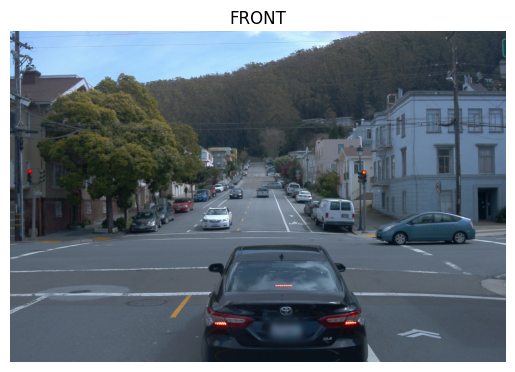

400
Loaded image (457593 bytes) for camera_image.key.camera_name=2 1553628872248975 camera_image.key.camera_name=2
Loaded image (313422 bytes) for camera_image.key.camera_name=4 1553628872248975 camera_image.key.camera_name=4
Loaded image (340909 bytes) for camera_image.key.camera_name=3 1553628872248975 camera_image.key.camera_name=3
Loaded image (194078 bytes) for camera_image.key.camera_name=5 1553628872248975 camera_image.key.camera_name=5
Loaded image (432200 bytes) for camera_image.key.camera_name=1 1553628872348961 camera_image.key.camera_name=1
Loaded image (457331 bytes) for camera_image.key.camera_name=2 1553628872348961 camera_image.key.camera_name=2
Loaded image (313580 bytes) for camera_image.key.camera_name=4 1553628872348961 camera_image.key.camera_name=4
Loaded image (340241 bytes) for camera_image.key.camera_name=3 1553628872348961 camera_image.key.camera_name=3
Loaded image (194418 bytes) for camera_image.key.camera_name=5 1553628872348961 camera_image.key.camera_name

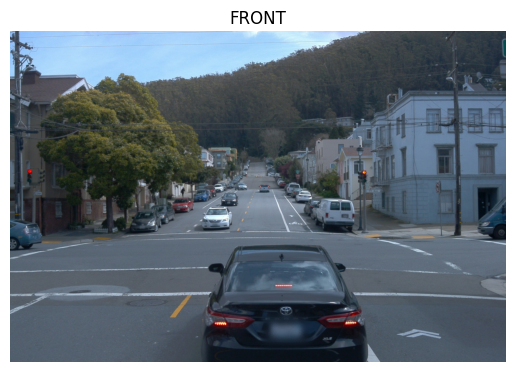

500
Loaded image (457782 bytes) for camera_image.key.camera_name=2 1553628874248951 camera_image.key.camera_name=2
Loaded image (314311 bytes) for camera_image.key.camera_name=4 1553628874248951 camera_image.key.camera_name=4
Loaded image (339241 bytes) for camera_image.key.camera_name=3 1553628874248951 camera_image.key.camera_name=3
Loaded image (194757 bytes) for camera_image.key.camera_name=5 1553628874248951 camera_image.key.camera_name=5
Loaded image (433957 bytes) for camera_image.key.camera_name=1 1553628874348939 camera_image.key.camera_name=1
Loaded image (457310 bytes) for camera_image.key.camera_name=2 1553628874348939 camera_image.key.camera_name=2
Loaded image (314446 bytes) for camera_image.key.camera_name=4 1553628874348939 camera_image.key.camera_name=4
Loaded image (339681 bytes) for camera_image.key.camera_name=3 1553628874348939 camera_image.key.camera_name=3
Loaded image (194762 bytes) for camera_image.key.camera_name=5 1553628874348939 camera_image.key.camera_name

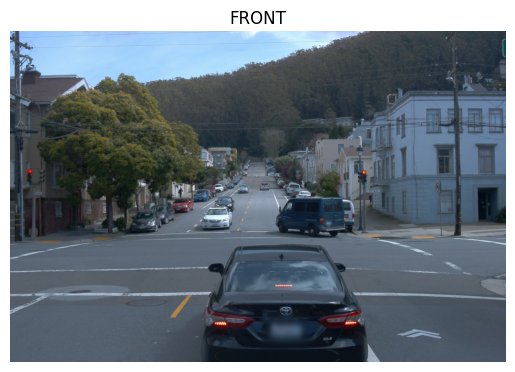

600
Loaded image (456113 bytes) for camera_image.key.camera_name=2 1553628876248899 camera_image.key.camera_name=2
Loaded image (314543 bytes) for camera_image.key.camera_name=4 1553628876248899 camera_image.key.camera_name=4
Loaded image (340981 bytes) for camera_image.key.camera_name=3 1553628876248899 camera_image.key.camera_name=3
Loaded image (194343 bytes) for camera_image.key.camera_name=5 1553628876248899 camera_image.key.camera_name=5
Loaded image (430953 bytes) for camera_image.key.camera_name=1 1553628876348889 camera_image.key.camera_name=1
Loaded image (456406 bytes) for camera_image.key.camera_name=2 1553628876348889 camera_image.key.camera_name=2
Loaded image (315015 bytes) for camera_image.key.camera_name=4 1553628876348889 camera_image.key.camera_name=4
Loaded image (341131 bytes) for camera_image.key.camera_name=3 1553628876348889 camera_image.key.camera_name=3
Loaded image (194525 bytes) for camera_image.key.camera_name=5 1553628876348889 camera_image.key.camera_name

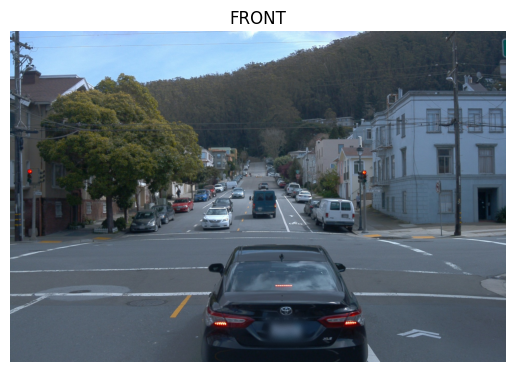

700
Loaded image (456659 bytes) for camera_image.key.camera_name=2 1553628878248901 camera_image.key.camera_name=2
Loaded image (314918 bytes) for camera_image.key.camera_name=4 1553628878248901 camera_image.key.camera_name=4
Loaded image (340357 bytes) for camera_image.key.camera_name=3 1553628878248901 camera_image.key.camera_name=3
Loaded image (194438 bytes) for camera_image.key.camera_name=5 1553628878248901 camera_image.key.camera_name=5
Loaded image (431705 bytes) for camera_image.key.camera_name=1 1553628878348891 camera_image.key.camera_name=1
Loaded image (456528 bytes) for camera_image.key.camera_name=2 1553628878348891 camera_image.key.camera_name=2
Loaded image (314758 bytes) for camera_image.key.camera_name=4 1553628878348891 camera_image.key.camera_name=4
Loaded image (340352 bytes) for camera_image.key.camera_name=3 1553628878348891 camera_image.key.camera_name=3
Loaded image (194671 bytes) for camera_image.key.camera_name=5 1553628878348891 camera_image.key.camera_name

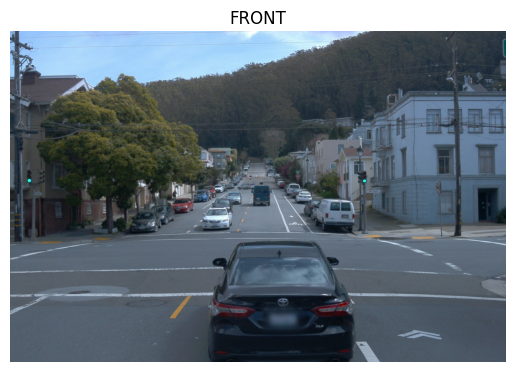

800
Loaded image (453292 bytes) for camera_image.key.camera_name=2 1553628880248841 camera_image.key.camera_name=2
Loaded image (314846 bytes) for camera_image.key.camera_name=4 1553628880248841 camera_image.key.camera_name=4
Loaded image (337384 bytes) for camera_image.key.camera_name=3 1553628880248841 camera_image.key.camera_name=3
Loaded image (193680 bytes) for camera_image.key.camera_name=5 1553628880248841 camera_image.key.camera_name=5
Loaded image (427639 bytes) for camera_image.key.camera_name=1 1553628880348826 camera_image.key.camera_name=1
Loaded image (453105 bytes) for camera_image.key.camera_name=2 1553628880348826 camera_image.key.camera_name=2
Loaded image (315233 bytes) for camera_image.key.camera_name=4 1553628880348826 camera_image.key.camera_name=4
Loaded image (337733 bytes) for camera_image.key.camera_name=3 1553628880348826 camera_image.key.camera_name=3
Loaded image (193953 bytes) for camera_image.key.camera_name=5 1553628880348826 camera_image.key.camera_name

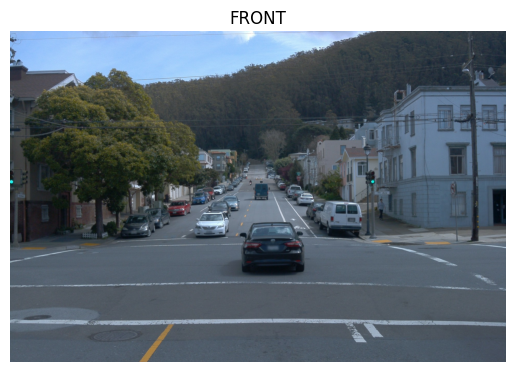

900
Loaded image (439043 bytes) for camera_image.key.camera_name=2 1553628882249087 camera_image.key.camera_name=2
Loaded image (320215 bytes) for camera_image.key.camera_name=4 1553628882249087 camera_image.key.camera_name=4
Loaded image (344773 bytes) for camera_image.key.camera_name=3 1553628882249087 camera_image.key.camera_name=3
Loaded image (192042 bytes) for camera_image.key.camera_name=5 1553628882249087 camera_image.key.camera_name=5
Loaded image (423242 bytes) for camera_image.key.camera_name=1 1553628882349071 camera_image.key.camera_name=1
Loaded image (437747 bytes) for camera_image.key.camera_name=2 1553628882349071 camera_image.key.camera_name=2
Loaded image (318888 bytes) for camera_image.key.camera_name=4 1553628882349071 camera_image.key.camera_name=4
Loaded image (348960 bytes) for camera_image.key.camera_name=3 1553628882349071 camera_image.key.camera_name=3
Loaded image (192191 bytes) for camera_image.key.camera_name=5 1553628882349071 camera_image.key.camera_name

In [47]:
from waymo_open_dataset import dataset_pb2 as open_dataset
import matplotlib.pyplot as plt
import dask.dataframe as dd
import tensorflow as tf
from waymo_open_dataset import v2


camera_left_to_right_order = [open_dataset.CameraName.SIDE_LEFT, #4
                            open_dataset.CameraName.FRONT_LEFT, #2
                            open_dataset.CameraName.FRONT, #1
                            open_dataset.CameraName.FRONT_RIGHT, #3
                            open_dataset.CameraName.SIDE_RIGHT] #5

camera_name_list = {
   1 : "FRONT",
   2 : "FRONT_LEFT",
   3 : "FRONT_RIGHT",
   4 : "SIDE_LEFT",
   5 : "SIDE_RIGHT"
}
camera_name_num = 1

# Path to the directory with all components
dataset_dir = '/media/kaiwenjon/Kevin-linux-dats/waymo/dataset_v2/validation'

context_name = '17065833287841703_2980_000_3000_000'

def read(tag: str) -> dd.DataFrame:
  """Creates a Dask DataFrame for the component specified by its tag."""
  paths = tf.io.gfile.glob(f'{dataset_dir}/{tag}/{context_name}.parquet')
  return dd.read_parquet(paths)


camera_image_df = read('camera_image')
# Filter the images from camera=1
# NOTE: We could also use push down filters while reading the parquet files as well
# Details https://docs.dask.org/en/stable/generated/dask.dataframe.read_parquet.html#dask.dataframe.read_parquet
# camera_image_df = camera_image_df[camera_image_df['key.camera_name'] == camera_name_num]

# camera_box_df = read('camera_box')
# # Inner join the camera_image table with the camera_box table.
# df = camera_image_df.merge(
#     camera_box_df,
#     on=[
#         'key.segment_context_name',
#         'key.frame_timestamp_micros',
#         'key.camera_name',
#     ],
#     how='inner',
# )
for i, (key_values, row) in enumerate(camera_image_df.iterrows()):
    # Create corresponding components from the raw
#     _, row = next(iter(camera_image_df.iterrows()))

    camera_image = v2.CameraImageComponent.from_dict(row)

    print(
            f'Loaded image ({len(camera_image.image)} bytes) for'
            f' {camera_image.key.camera_name=} {camera_image.key.frame_timestamp_micros} {camera_image.key.camera_name=}'
        )
    if(i % 100 == 0):
        plt.imshow(tf.image.decode_jpeg(camera_image.image))
        plt.title(camera_name_list[camera_image.key.camera_name])
        plt.grid(False)
        plt.axis('off')
        plt.show()
        print(i)